# 01 Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 02 Import Data

In [4]:
path = r'C:\Users\isava\OneDrive\Documents\CareerFoundry\Data Immersion\AdvancedAnalytics\WorldRiskIndex'

In [5]:
df = pd.read_csv(os.path.join(path,'02 Data','CleanedData', 'world_risk_index_cleaned.csv'))

In [7]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippines,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Solomon Islands,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


# 03 Data Prep for Analysis

Subset data to only have numerical data. Numerical data is on the same scale so I do not need to standardize it. 

In [16]:
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,7.549368,15.380538,48.101650,30.739384,70.471023,43.094663,2016.050653
std,5.553269,10.239401,13.816607,15.666927,15.010563,13.553476,3.183362
min,0.020000,0.050000,20.970000,8.260000,35.160000,11.160000,2011.000000
25%,3.740000,10.140000,37.080000,17.795000,59.390000,33.185000,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.090000,2016.000000
75%,9.385000,16.450000,60.115000,42.625000,83.010000,53.070000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [13]:
df_val = df[['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities']].copy() #Prevents errors with kmeans.

In [52]:
df_val.head()

,WRI,Exposure,Vulnerability,Lack of Coping Capabilities,Lack of Adaptive Capacities
0,32.00,56.33,56.81,79.34,53.96
1,29.08,56.04,51.90,81.80,44.97
2,24.32,45.09,53.93,82.78,44.01
3,23.51,36.40,64.60,85.95,63.74
4,20.88,38.42,54.35,77.83,49.87


# 04 Clustering

## Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_val).score(df_val) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1877727.9431916447,
 -806676.621137423,
 -518569.4781713815,
 -392678.3940247051,
 -331559.7585679749,
 -287654.6357784831,
 -259924.67347559013,
 -237533.9736661591,
 -218962.642936654]

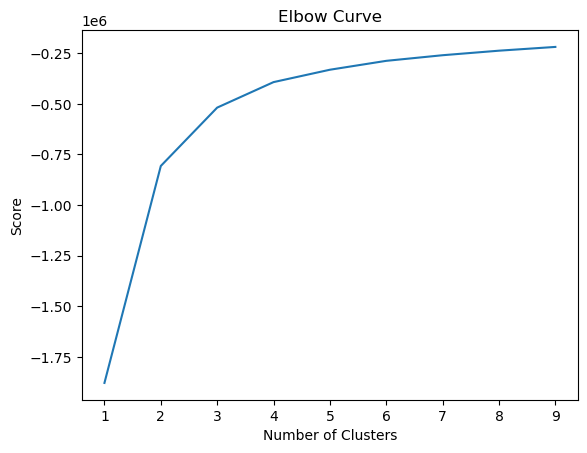

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal number of clusters is 2-4. 

## k-means Clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_val)

KMeans(n_clusters=3)

In [26]:
df_val['clusters'] = kmeans.fit_predict(df_val)

In [28]:
df_val.head()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,clusters
0,32.00,56.33,56.81,37.14,79.34,53.96,2
1,29.08,56.04,51.90,28.94,81.80,44.97,2
2,24.32,45.09,53.93,34.99,82.78,44.01,2
3,23.51,36.40,64.60,44.11,85.95,63.74,0
4,20.88,38.42,54.35,35.36,77.83,49.87,2


In [30]:
df_val['clusters'].value_counts()

clusters
2    777
1    578
0    560
Name: count, dtype: int64

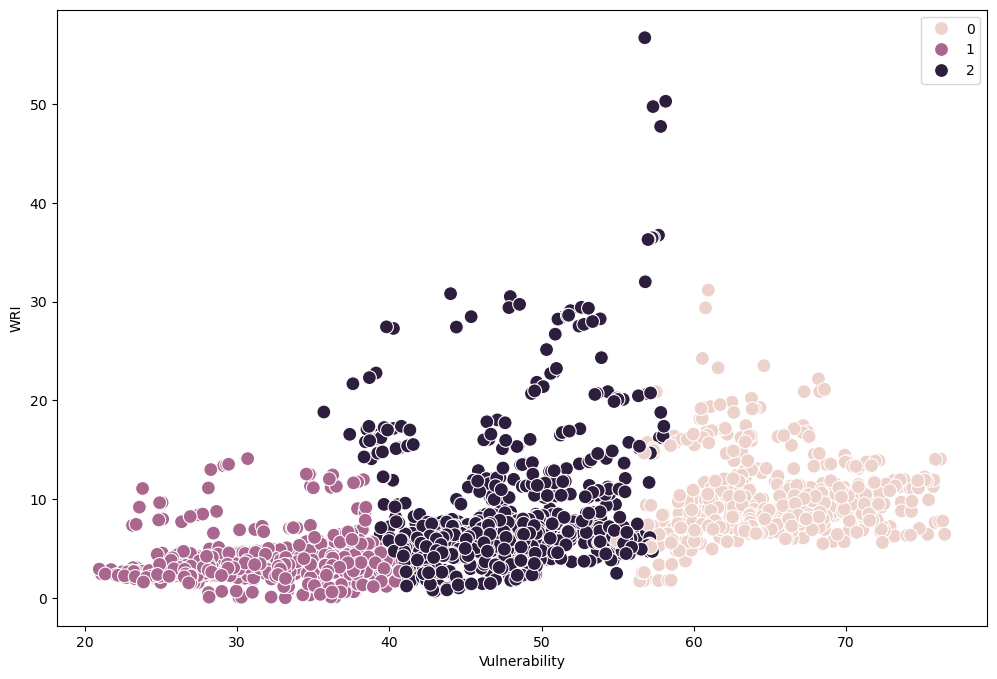

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Vulnerability'], y=df_val['WRI'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Vulnerability') # Label x-axis.
plt.ylabel('WRI') # Label y-axis.
plt.show()

 - Cluster 2 created for the high WRI values with Vulnerability between 35 and 65.
- Cluster 1 has a low vulnerability score and low WRI.
- Cluster 0 has high vulnerability score but low WRI.

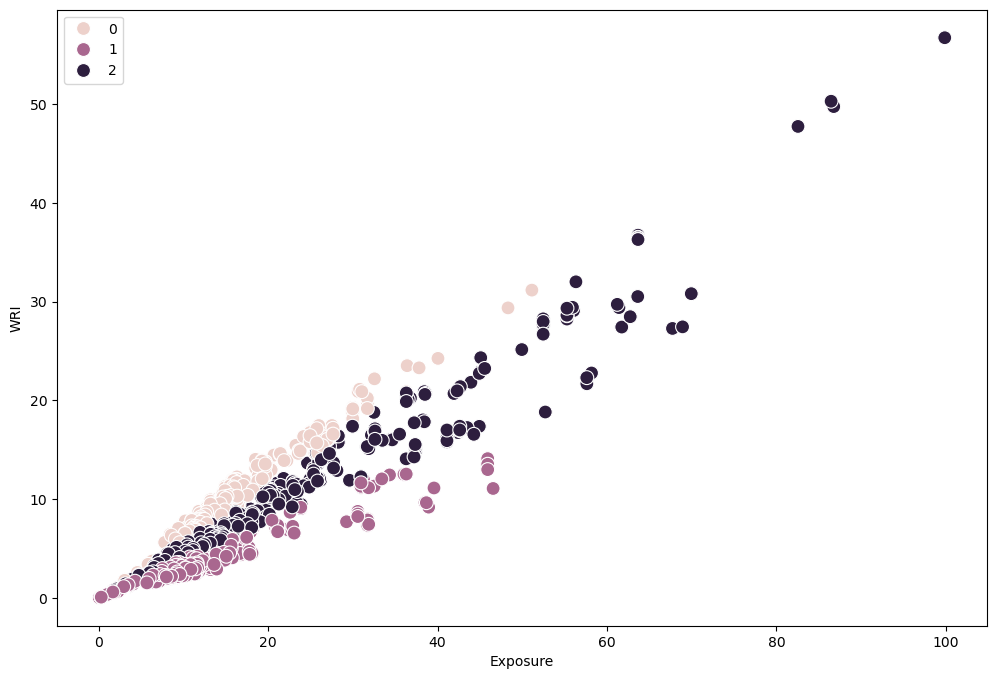

In [49]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Exposure'], y=df_val['WRI'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Exposure') # Label x-axis.
plt.ylabel('WRI') # Label y-axis.
plt.show()

Text(0.5, 0.92, 'WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities')

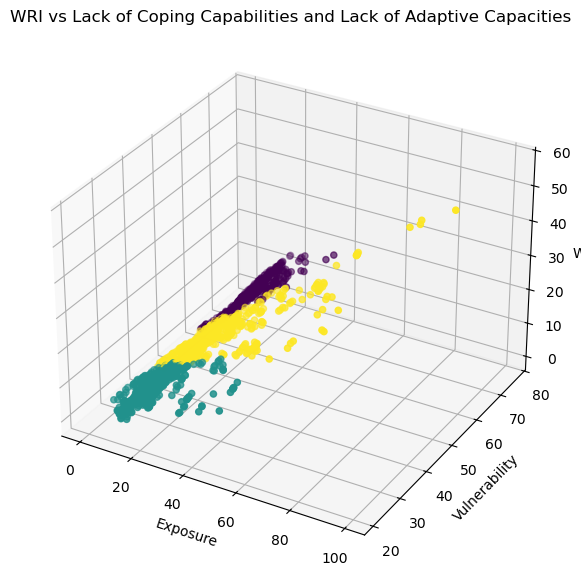

In [51]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Exposure'], df_val['Vulnerability'], df_val['WRI'], c = df_val['clusters'])
ax.set_xlabel('Exposure')
ax.set_ylabel('Vulnerability')
ax.set_zlabel('WRI')

plt.title("WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities")

Text(0.5, 0.92, 'WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities')

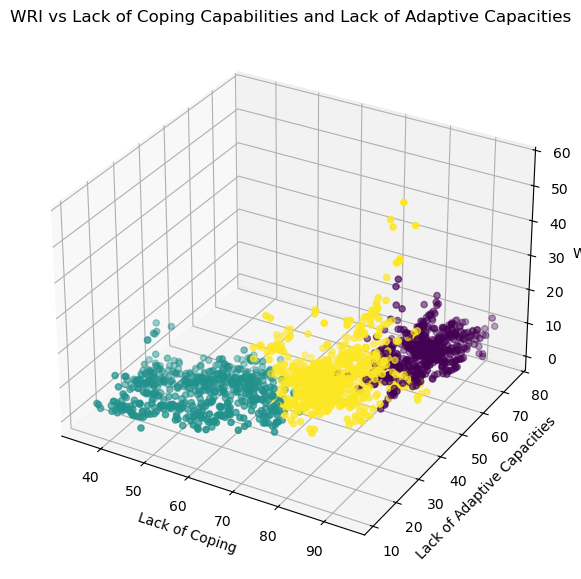

In [53]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Lack of Coping Capabilities'], df_val['Lack of Adaptive Capacities'], df_val['WRI'], c = df_val['clusters'])
ax.set_xlabel('Lack of Coping')
ax.set_ylabel('Lack of Adaptive Capacities')
ax.set_zlabel('WRI')

plt.title("WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities")

This again shows that mid range values of increased score for both coping and adaptive capacities.

Text(0.5, 0.92, 'WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities')

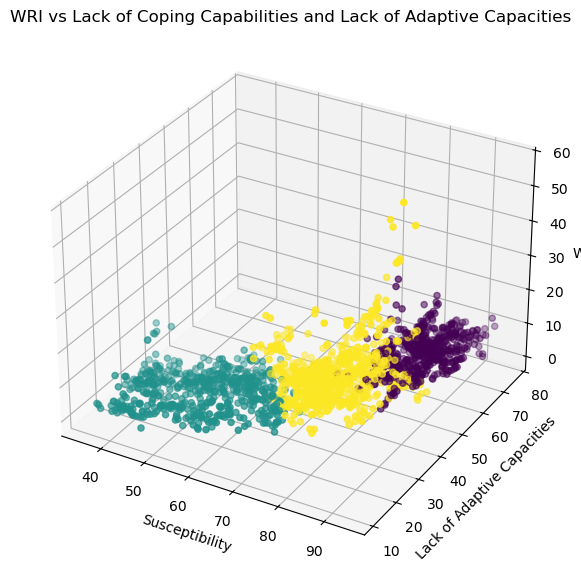

In [55]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Lack of Coping Capabilities'], df_val['Lack of Adaptive Capacities'], df_val['WRI'], c = df_val['clusters'])
ax.set_xlabel('Susceptibility')
ax.set_ylabel('Lack of Adaptive Capacities')
ax.set_zlabel('WRI')

plt.title("WRI vs Lack of Coping Capabilities and Lack of Adaptive Capacities")

Text(0.5, 0.92, 'Vulnerability vs Lack of Coping Capabilities and Lack of Adaptive Capacities')

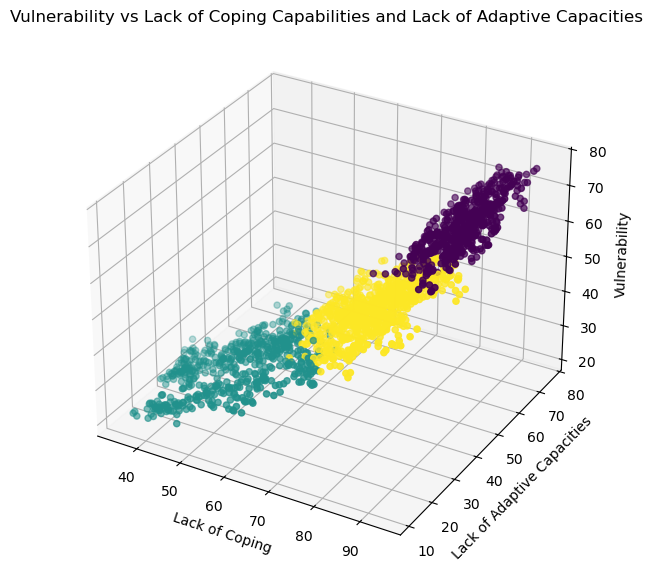

In [79]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Lack of Coping Capabilities'], df_val['Lack of Adaptive Capacities'], df_val['Vulnerability'], c = df_val['clusters'])
ax.set_xlabel('Lack of Coping')
ax.set_ylabel('Lack of Adaptive Capacities')
ax.set_zlabel('Vulnerability')

plt.title("Vulnerability vs Lack of Coping Capabilities and Lack of Adaptive Capacities")

Text(0.5, 0.92, 'Susceptibility vs Lack of Coping Capabilities and Lack of Adaptive Capacities')

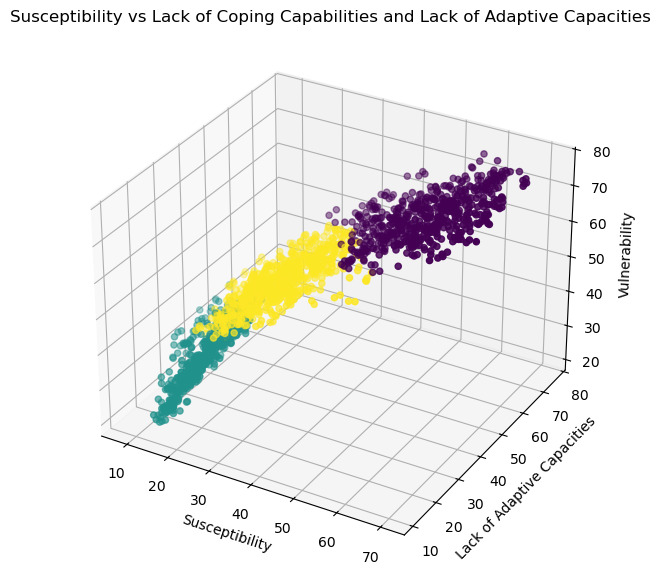

In [59]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Susceptibility'], df_val['Lack of Adaptive Capacities'], df_val['Vulnerability'], c = df_val['clusters'])
ax.set_xlabel('Susceptibility')
ax.set_ylabel('Lack of Adaptive Capacities')
ax.set_zlabel('Vulnerability')

plt.title("Susceptibility vs Lack of Coping Capabilities and Lack of Adaptive Capacities")

Text(0.5, 0.92, 'Susceptibility vs Lack of Coping Capabilities and Lack of Coping Capabilities')

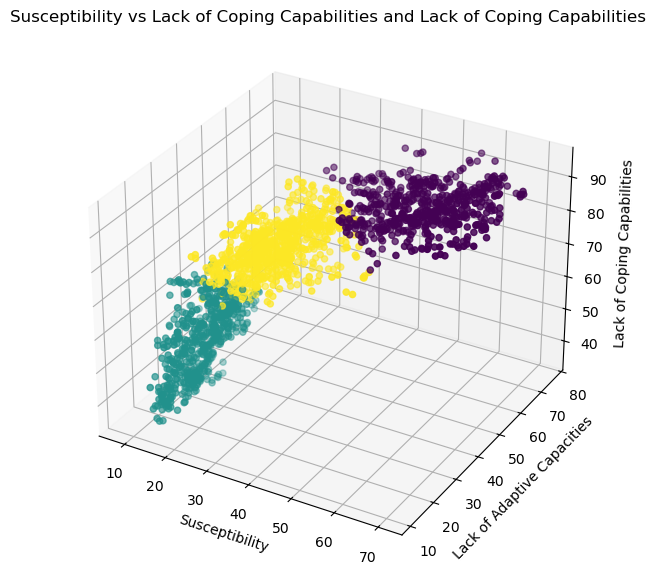

In [95]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df_val['Susceptibility'], df_val['Lack of Adaptive Capacities'], df_val['Lack of Coping Capabilities'], c = df_val['clusters'])
ax.set_xlabel('Susceptibility')
ax.set_ylabel('Lack of Adaptive Capacities')
ax.set_zlabel('Lack of Coping Capabilities')

plt.title("Susceptibility vs Lack of Coping Capabilities and Lack of Coping Capabilities")

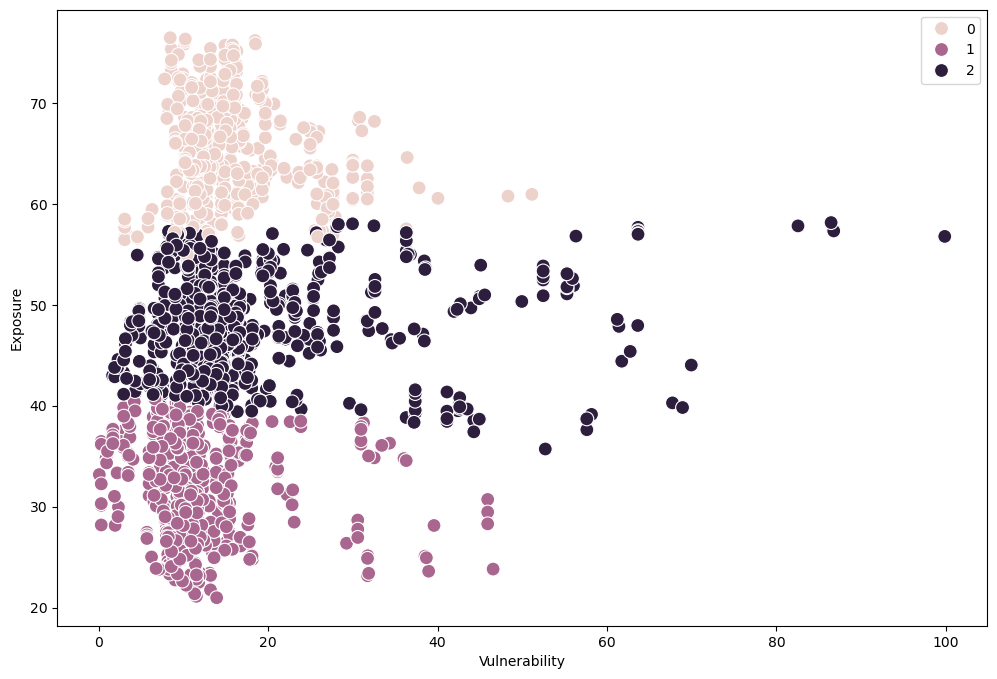

In [63]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Exposure'], y=df_val['Vulnerability'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Vulnerability') # Label x-axis.
plt.ylabel('Exposure') # Label y-axis.
plt.show()

- Countries with high exposure tend to have lower vulnerability indicating that they have implemented precautionary measures to manage if disaster striked.
- Countries with exposure scores < 40 also have lower vulnerability scores indicating they have great preparedness despite lack of potential disaster.
- Countries with exposure scores from 40 - 55 have a wide range of vulnerability scores, indicating that this cluster could increase their preparedness policies. 

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Exposure'], y=df_val['Vulnerability'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Vulnerability') # Label x-axis.
plt.ylabel('Exposure') # Label y-axis.
plt.show()

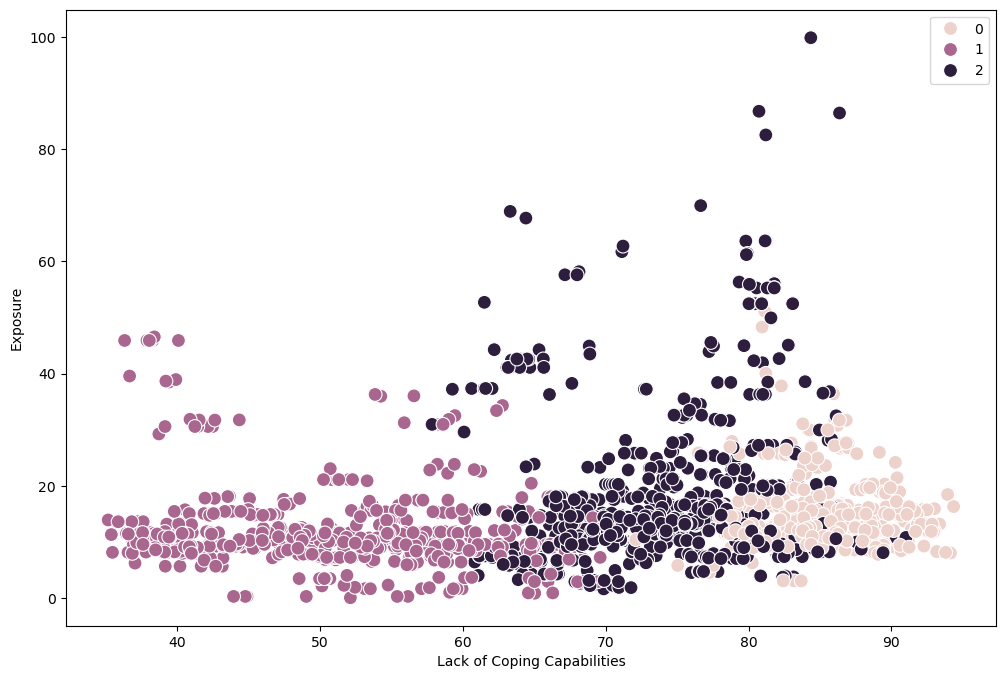

In [65]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Lack of Coping Capabilities'], y=df_val['Exposure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lack of Coping Capabilities') # Label x-axis.
plt.ylabel('Exposure') # Label y-axis.
plt.show()

In [75]:
df_val.loc[df_val['clusters'] == 2, 'cluster'] = 'dark purple'
df_val.loc[df_val['clusters'] == 1, 'cluster'] = 'purple'
df_val.loc[df_val['clusters'] == 0, 'cluster'] = 'pink'

df_val.groupby('cluster').agg({'Lack of Coping Capabilities':['mean', 'median'], 
                         'Lack of Adaptive Capacities':['mean', 'median'], 
                         'Susceptibility':['mean', 'median'],
                          'Vulnerability':['mean', 'median'],
                              'Exposure':['mean','median'],
                              'WRI':['mean','median']})

Lack of Coping Capabilities         Lack of Adaptive Capacities  \
                                   mean  median                        mean   
cluster                                                                       
dark purple                   73.897658  74.430                   42.736036   
pink                          85.524589  85.785                   58.900875   
purple                        51.279862  51.260                   28.262785   

                    Susceptibility         Vulnerability           Exposure  \
             median           mean  median          mean  median       mean   
cluster                                                                       
dark purple  43.090      26.098970  25.590     47.577529  47.200  18.128880   
pink         58.875      52.194089  52.865     65.539857  65.785  15.019071   
purple       28.925      16.190882  16.035     31.911073  32.125  12.036176   

                         WRI         
            median      mean median  
cluster                              
dark purple  14.31  8.710528   6.61  
pink         13.52  9.810089   8.99  
purple       10.71  3.798114   3.39

- Groups with Lack of Coping capabilities from about 60-80  tend to have high Exposure. Groups with lack of coping capabilities < 60 have lower Exposure scores. This reveals a cluster with great preparedness despite lower exposure to disaster.

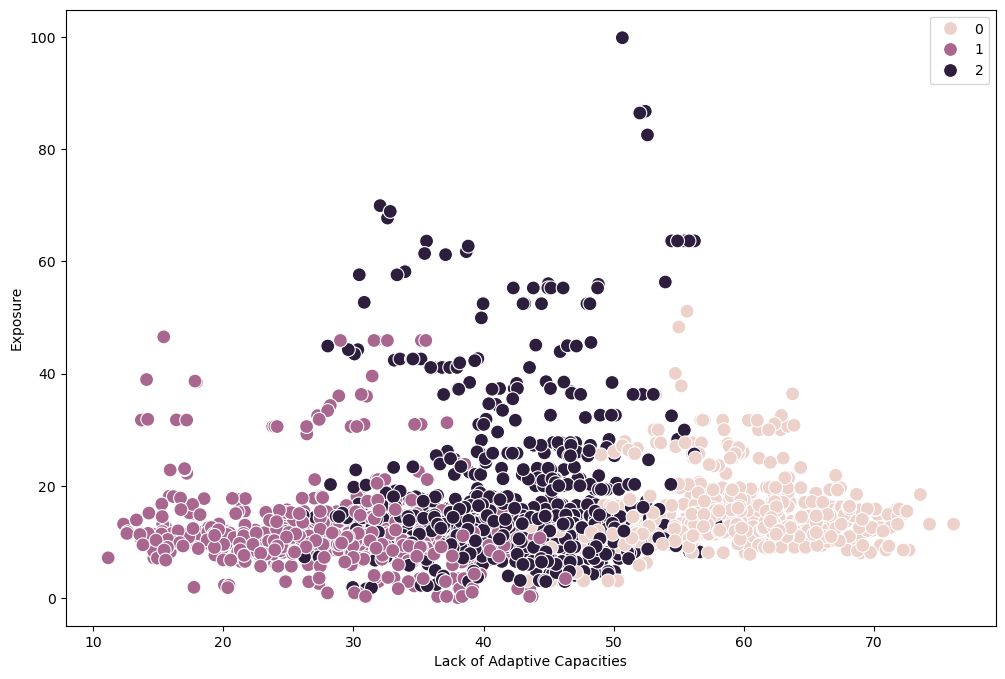

In [67]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Lack of Adaptive Capacities'], y=df_val['Exposure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lack of Adaptive Capacities') # Label x-axis.
plt.ylabel('Exposure') # Label y-axis.
plt.show()

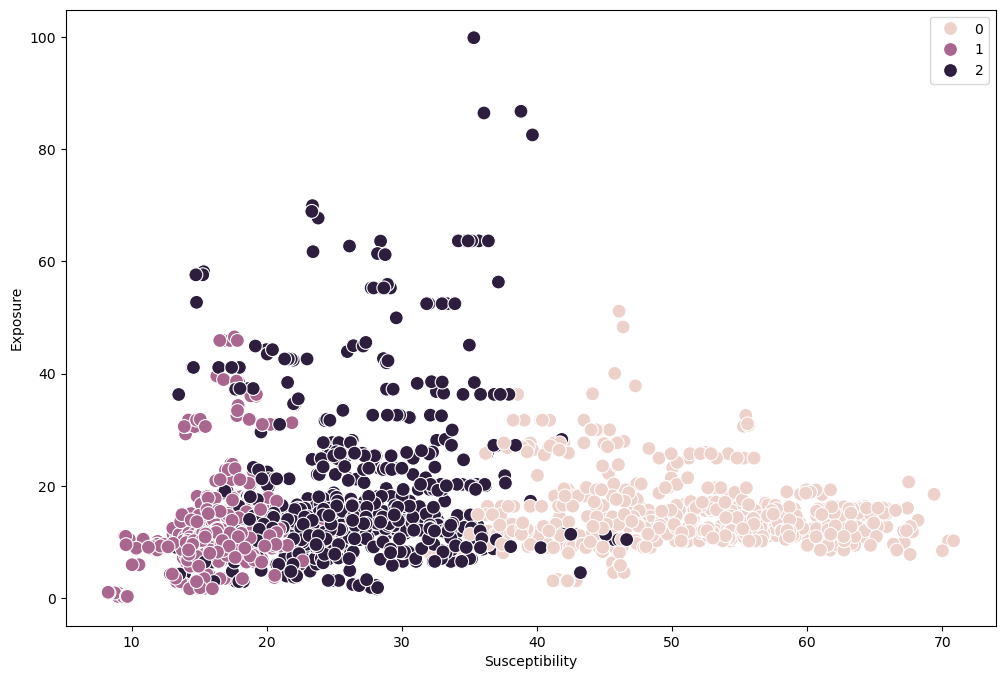

In [69]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_val['Susceptibility'], y=df_val['Exposure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Susceptibility') # Label x-axis.
plt.ylabel('Exposure') # Label y-axis.
plt.show()

# 05 Discussion

- The yellow cluster on the WRI vs Exposure vs Vulnerability plot reveals that countries with a high WRI tend to have a median amount of vulnerability. The countries with high exposure are in this group as well. This indicates that high risk countries  have some policies in place but not enough to circumvent their exposure.
- The green cluster on the WRI vs Exposure vs Vulnerability plot reveals an ideal cluster with low eposure and low vulnerability indicating that they would be safe in the case of disaster. They have implemented enough policies in the potential case of disaster which is relatively low anyway.
- The purple cluster on the WRI vs Exposure vs Vulnerability plot reveals that countries with a high low WRI but high vulnerability. This reveals countries that have low chance of disaster occuring but do not have preemtive safeguards just in case.

Overall, it appears that countries with high exposure have difficulties in overcoming the exposure by lowering their vulnerability. 